In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import decimal

Populating the interactive namespace from numpy and matplotlib


In [2]:
def generate_HT():
    '''
    Function to generate random number to represent head (1) or tail (0) in a coin toss. 
    What I did here is to generate an integer number between 0 and 4, and if it is one, then return one (head), 
    otherwise return zero (tail). This is to say, the probability of getting a head is 0.25, so it is a biased coin.
    '''
    #generate a random integer between 0 and 4
    rnd = np.random.randint(0,4)
    
    if rnd > 1:
        return 0
    else:
        return rnd

In [3]:
def simulation(N = 100):
    '''
    This is the function to simulate multiple toss of a coin, and it returns two numbers and a list:
    number of cases of head, and number of cases of tail, and outcome_list contains all the outcome 
    in order. N is the total number of toss. 
    '''
    outcome_list = []
    R = 0
    for i in range(N):
        out = generate_HT()
        if out == 1:
            R += 1
        outcome_list.append(out)    
    return R, N-R, outcome_list

In [4]:
def plot_posterior(R,T):
    '''
    This is the function to plot the posterior. 
    Input:
    R - number of cases of head
    T - number of cases of tail
    
    The assumption here is that each toss is independent of the others, and we use a binomial to model 
    the likelihood function. Because we don't know have any idea of the fairness of the coin, we just
    use a uniform distribution to model the prior. 
    '''
    #H is our parameter that is the probability of getting a head, we generate a grid from 0 to 1
    H = np.linspace(0,1,300)
    
    #calculate the posterior, the multiply by 1 is the prior (because it is a uniform prior)
    y = H**R*(1-H)**T * 1
    
    plt.plot(H, y)
    plt.xlabel('Bias-weighting for Heads', fontsize = 14)
    plt.ylabel('Posterior (without normalization)', fontsize = 14)
    plt.title(str(R) + ' heads, ' + str(T) + ' tails, total ' + str(R+T) +' tosses')
    plt.show()

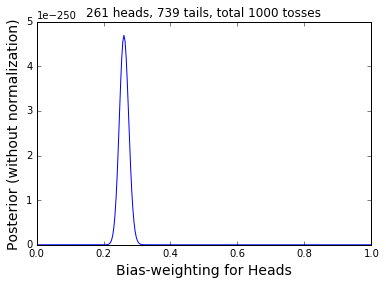

In [5]:
R, T, outcome_list = simulation(N = 1000)
plot_posterior(R,T)

## Plot the figure for different tosses

In [6]:
def plot_exmaple_of_all():
    '''
    This is the funciton to plot the figures show the evolution of the posterior pdf
    as the number of tosses increase. 
    '''
    n_tosses = [0, 1, 2, 3, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
    fig = plt.figure(figsize = (15,9.5))
    
    H = np.linspace(0.00001,0.9999999,300)
    
    #do a simulation with 4096 tosses
    total_R, total_T, outcome_list = simulation(N = 4096)
    
    for i, toss in enumerate(n_tosses):
        
        #get the outcome to the tosses
        outcome = outcome_list[0:toss]
        #get the total number of heads
        R = outcome.count(1)
        #get the total number of tails
        T = toss - R
        #calculate the posterior
        y = H**R*(1-H)**T * 1
        
        #here, because the values for the 2048 and 4096 tosses are too small, less than 1e-320, 
        #it becomes to zero, this is the underflow issue usually happen in bayesian analysis.
        #What I did here is to calculate the really small number using decimal module, and then 
        #multiply this small number by a scalar which is largest integer number divide by 20, 
        #this is more like a trial and error, so may not stable, but most of the time, it looks
        #fine, I don't know if there's better ways to work around. 
         
        if i > 12:
            #take the log of the likelihood, this will turn the multiply prbability into addition
            y1 = R*np.log(H) + T*np.log(1-H)
            y = []
            
            #recalculate the small number by taking the exp, but I multiplied by 10**factor, the
            #factor is largest decimal divide by 20.
            factor = int((-1)*np.min(y1[1:-1])/20)
            for item in y1:
                y.append(decimal.Decimal(item).exp()*10**factor)
        
        #plot the pdf
        ax = plt.subplot(5, 3, i+1)
        ax.plot(H, y)
        #disable y axis label
        ax.yaxis.set_visible(False)

        # Setting the x-axis major tick's label
        ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
        ax.set_xticklabels(['0','','0.5','','1'])
        ax.annotate(str(R) + 'H, ' + str(T) + 'T, N=' + str(toss), xy=(1, 0.1), xycoords='axes fraction', fontsize=12,
                horizontalalignment='right', verticalalignment='bottom')        
    
    plt.show()
        

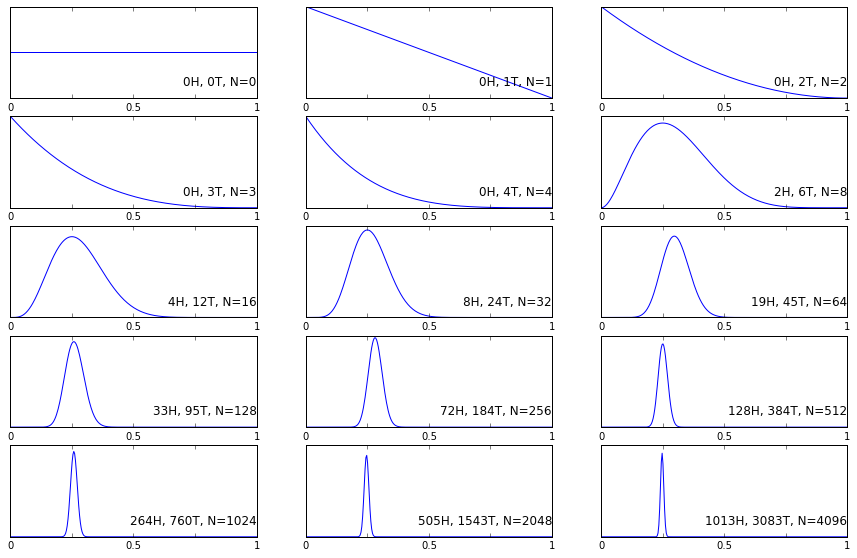

In [7]:
plot_exmaple_of_all()